In [105]:
import math

import pandas as pd


df = pd.read_csv("data/VideoDemographics.csv")
df  = df.loc[df["Sex"] == "Female"]
df

,ActorID,Age,Sex,Race,Ethnicity
1,1002,21,Female,Caucasian,Not Hispanic
2,1003,21,Female,Caucasian,Not Hispanic
3,1004,42,Female,Caucasian,Not Hispanic
5,1006,58,Female,Caucasian,Not Hispanic
6,1007,38,Female,African American,Not Hispanic
7,1008,46,Female,Caucasian,Not Hispanic
8,1009,24,Female,Caucasian,Not Hispanic
9,1010,27,Female,Caucasian,Not Hispanic
11,1012,23,Female,Caucasian,Not Hispanic
12,1013,22,Female,Caucasian,Hispanic


In [106]:
ids=df["ActorID"].tolist()
ids

[1002,
 1003,
 1004,
 1006,
 1007,
 1008,
 1009,
 1010,
 1012,
 1013,
 1018,
 1020,
 1021,
 1024,
 1025,
 1028,
 1029,
 1030,
 1037,
 1043,
 1046,
 1047,
 1049,
 1052,
 1053,
 1054,
 1055,
 1056,
 1058,
 1060,
 1061,
 1063,
 1072,
 1073,
 1074,
 1075,
 1076,
 1078,
 1079,
 1082,
 1084,
 1089,
 1091]

In [107]:
sentences = ["IEO","TIE","IWW","TAI","MTI","IWL","ITH","DFA","IOM","ITS","TSI","WSI"]
emotions =["ANG","HAP","FEA","SAD"]


In [108]:
from pydub import AudioSegment
from scipy.io.wavfile import read

In [109]:
import os.path
import  math 

from Project.write_back_audio import write_back_audio
once=False
for id in ids[:1]:
    for sentence in sentences:
        name="data/curve_1000_right/"+str(id)+"_"+sentence+"_NEU_XX"
        
        if os.path.isfile(name) and not once:
            f1 = open(name, "r")  
            l1=f1.readlines()
            v1=l1[1].split(",")[:-1]
            p1=l1[3].split(",")[:-1]
            for emotion in emotions:
                for intensity in ["XX","HI","LO"]:
                    name="data/curve_1000_right/"+str(id)+"_"+sentence+"_"+emotion+"_"+intensity+""       
                    if os.path.isfile(name) and not once:
                        print(name)
                        f2 = open(name, "r")
                        l2=f2.readlines()
                        v2=l2[1].split(",")[:-1]
                        p2=l2[3].split(",")[:-1]
                        vv1=[]
                        vv2=[]
                        divp=[]
                        #l1=math.floor(len(v1)/10)
                        #l2=math.floor((v2)/10)
                        #for l in range(10):
                        lp1=math.floor(len(p1)/6)
                        lp2=math.floor(len(p2)/6)
                        for j in range(6):
                            count=0
                            pmed=0
                            for i in range(j*lp1,(j+1)*lp1):
                                if i<len(p1):
                                    count+=1
                                    pmed+=float(p1[i])
                            p1med=pmed/count
                            count=0
                            pmed=0
                            for i in range(j*lp2,(j+1)*lp2):
                                if i<len(p1):
                                    count+=1
                                    pmed+=float(p2[i])
                            p2med=pmed/count
                            divp.append(p2med-p1med)
                            
                                    
                        if len(v1)==len(v2):
                            div=[]
                            for j in range(5):
                                n1=0
                                n2=0
                                for i in range(j*200,(j+1)*200):
                                    n1+=abs(float(v2[i]))
                                    vv1.append(abs(float(v2[i])))
                                    n2+=abs(float(v1[i]))   
                                    vv2.append(abs(float(v1[i])))
                                if n1<math.inf and n2<math.inf and n2!=0:
                                    div.append((n1/n2))
                                else:
                                    div.append(0)
                            audioname="data/AudioWAV/"+str(id)+"_"+sentence+"_NEU_XX.wav"
                            rate, data = read(audioname)
                            audio = AudioSegment.from_file(audioname, 'r')
                            dif=float(l2[2])-float(l1[2])

                            length = data.shape[0] / rate
                            final=write_back_audio([1]*(len(div)+1),div,[dif]*(len(div)+1),audio,length)
                            final.export("data/"+str(id)+"_"+sentence+"_"+emotion+"_"+intensity+"test.wav", format="wav")
                            once=True
            

                        f2.close()
            f1.close()
        



data/curve_1000_right/1002_IEO_ANG_HI


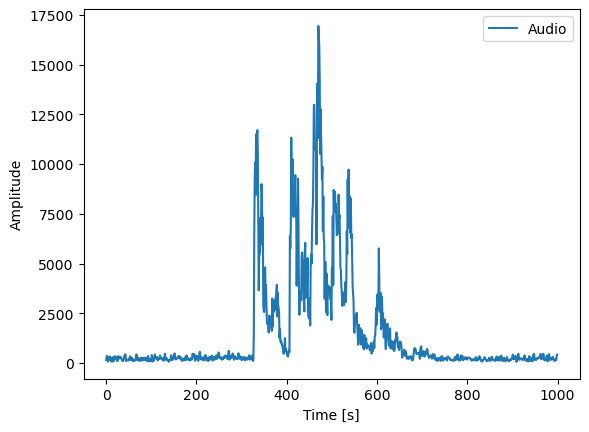

In [110]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([i for i in range(1000)], vv1, label="Audio")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [111]:
vv1

[147.0,
 314.0,
 364.0,
 265.0,
 70.0,
 269.0,
 183.0,
 248.0,
 326.0,
 292.0,
 96.0,
 239.0,
 212.0,
 61.0,
 92.0,
 295.0,
 171.0,
 107.0,
 186.0,
 333.0,
 273.0,
 312.0,
 318.0,
 163.0,
 138.0,
 90.0,
 305.0,
 346.0,
 218.0,
 262.0,
 291.0,
 315.0,
 299.0,
 245.0,
 190.0,
 129.0,
 117.0,
 89.0,
 138.0,
 266.0,
 249.0,
 399.0,
 439.0,
 402.0,
 103.0,
 171.0,
 146.0,
 138.0,
 162.0,
 129.0,
 132.0,
 236.0,
 182.0,
 336.0,
 265.0,
 155.0,
 200.0,
 267.0,
 206.0,
 112.0,
 96.0,
 167.0,
 91.0,
 161.0,
 139.0,
 157.0,
 164.0,
 430.0,
 306.0,
 155.0,
 265.0,
 127.0,
 186.0,
 221.0,
 202.0,
 100.0,
 111.0,
 265.0,
 232.0,
 218.0,
 256.0,
 124.0,
 263.0,
 147.0,
 142.0,
 246.0,
 228.0,
 264.0,
 160.0,
 169.0,
 92.0,
 211.0,
 324.0,
 351.0,
 124.0,
 77.0,
 176.0,
 188.0,
 210.0,
 98.0,
 182.0,
 401.0,
 292.0,
 76.0,
 109.0,
 109.0,
 147.0,
 329.0,
 434.0,
 270.0,
 294.0,
 231.0,
 204.0,
 298.0,
 130.0,
 161.0,
 238.0,
 239.0,
 192.0,
 381.0,
 333.0,
 236.0,
 241.0,
 221.0,
 174.0,
 213.0,
 238

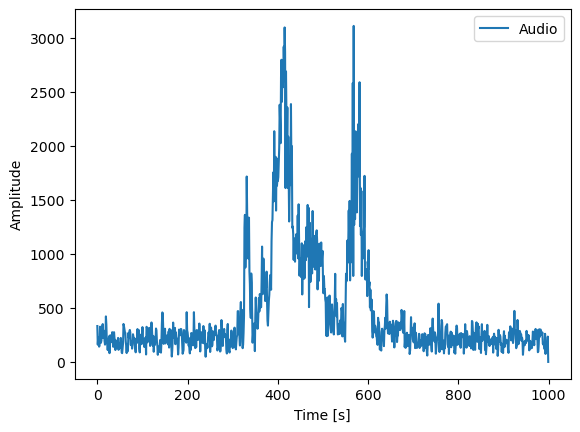

In [112]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([i for i in range(1000)], vv2, label="Audio")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [113]:
divp

[0.32163742690058417,
 1.4181286549707606,
 1.9678362573099415,
 -2.8771929824561404,
 0.49122807017543835,
 1.4513888888888893]